In [1]:
import numpy as np
import torch
import torch_geometric.nn
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

import torch
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import scanpy as sc
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import ot

import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import pickle

from torch_geometric.nn import GAE
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import TransformerConv
from torch_geometric.nn import SuperGATConv
from torch_geometric.nn import GMMConv
from torch_geometric.nn import HypergraphConv

In [2]:
from torch_geometric.utils import negative_sampling
from pytorch_metric_learning.losses import NTXentLoss

In [3]:
# for specific encoder/decoder
# tissue_list = { 
#                "heart":[233, 676, 783, 947,266, 223, 233, 978, 928, 852, 839, 733]}

tissue_list = { 
               "scrna_heart":['D4',
 'H2',
 'H3',
 'D6',
 'D2',
 'H7',
 'D11',
 'D3',
 'D1',
 'D5',
 'H4',
 'D7',
 'H6',
 'H5',
 'G19'], 
}

# construct graph batch
# based on simulation results
graph_list = []
cor_list = []
label_list = []
count = 0

for tissue in tissue_list.keys():
    for i in tissue_list[tissue]:
        print(i)
        pathway_count = f"./heart_atlas/{tissue}_" + i + "_rna_expression" + ".csv"
        pathway_matrix = f"./heart_atlas/{tissue}_" + i + "_pvalue" + ".csv"

        pd_adata_new =  pd.read_csv(pathway_count, index_col=0)
        correlation = pd.read_csv(pathway_matrix, index_col=0)
        cor_list.append(correlation)

        print(correlation.shape)
        print(pd_adata_new.shape)
        adata = sc.AnnData(pd_adata_new)

        adata_new = adata.copy()
        edges_new = np.array([np.nonzero(correlation.values)[0],np.nonzero(correlation.values)[1]])
        graph = data.Data(x=torch.FloatTensor(adata_new.X.copy()), edge_index=torch.FloatTensor(edges_new).long())

        vis = to_networkx(graph)
        graph.gene_list = pd_adata_new.index
        graph.show_index = tissue +"__" + str(i)

        graph_list.append(graph)
        label_list.append(tissue)
        
        count +=1

D4
(1000, 1000)
(1000, 26997)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H2
(1000, 1000)
(1000, 20506)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H3
(1000, 1000)
(1000, 31455)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D6
(1000, 1000)
(1000, 57867)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D2
(1000, 1000)
(1000, 42226)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H7
(1000, 1000)
(1000, 30963)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D11
(1000, 1000)
(1000, 12443)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D3
(1000, 1000)
(1000, 23195)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D1
(1000, 1000)
(1000, 14958)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D5
(1000, 1000)
(1000, 22449)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H4
(1000, 1000)
(1000, 24889)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


D7
(1000, 1000)
(1000, 35064)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H6
(1000, 1000)
(1000, 26004)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


H5
(1000, 1000)
(1000, 37334)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


G19
(1000, 1000)
(1000, 3698)


/tmp/ipykernel_18688/3242863727.py:42: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(pd_adata_new)


In [4]:
# with open("heart_rna_graph_list", "wb") as fp:
#     pickle.dump(graph_list, fp)
# with open("heart_rna_cor_list", "wb") as fp:
#     pickle.dump(cor_list, fp)
# with open("heart_rna_label_list", "wb") as fp:
#     pickle.dump(label_list, fp)

In [5]:
class MLPEncoder_Multiinput(torch.nn.Module):
    def __init__(self, out_channels, graph_list, label_list):
        super(MLPEncoder_Multiinput, self).__init__()
        self.activ = nn.Mish()
        
        conv_dict = {}
        for i in graph_list:
            conv_dict[i.show_index] = nn.Linear(i.x.shape[1], out_channels*4)
        self.convl1 = nn.ModuleDict(conv_dict)
        
    def forward(self, x, edge_index, show_index):
        x = self.convl1[show_index](x)
        x = self.activ(x)
        return x

In [6]:
class MLPEncoder_Commoninput(torch.nn.Module):
    def __init__(self, out_channels, graph_list, label_list):
        super(MLPEncoder_Commoninput, self).__init__()
        self.activ = nn.Mish()
        
        conv_dict_l2 = {}
        conv_dict_l3 = {}
        tissue_specific_list = list(set(label_list))
        
        for i in tissue_specific_list:
            conv_dict_l2[i] = nn.Linear(out_channels*4, out_channels*2)
            conv_dict_l3[i] = nn.Linear(out_channels*2, out_channels)
        self.convl2 = nn.ModuleDict(conv_dict_l2)
        self.convl3 = nn.ModuleDict(conv_dict_l3)
        
    
    def get_weight(self, show_index):
        return self.convl2[show_index.split('__')[0]].state_dict(), self.convl3[show_index.split('__')[0]].state_dict()
            
        
    def forward(self, x, edge_index, show_index):
        x = self.convl2[show_index.split('__')[0]](x)
        x = self.activ(x)
        return self.convl3[show_index.split('__')[0]](x)
    

In [7]:
class MLP_edge_Decoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels, graph_list):
        super(MLP_edge_Decoder, self).__init__()
        
        dec_dict = {}
        for i in graph_list:
            dec_dict[i.show_index] = torch.nn.Sequential(
                                              nn.Linear(in_channels,  out_channels)
                                             , nn.Mish(),
                                              nn.Linear(out_channels,  out_channels) 
                                              ,nn.Mish(),
                                              nn.Linear(out_channels,  out_channels)
                                             )
        self.MLP = nn.ModuleDict(dec_dict)
        
    def forward(self, x, show_index):
        x = self.MLP[show_index](x)
        return torch.sigmoid(x)

In [8]:
gene_encoder_is = MLPEncoder_Multiinput(32, graph_list, label_list).to(device)
gene_encoder_com = MLPEncoder_Commoninput(32, graph_list, label_list).to(device)

In [9]:
gene_decoder = MLP_edge_Decoder(1000,1000,graph_list).to(device)

In [10]:
optimizer_enc_is = torch.optim.Adam(gene_encoder_is.parameters(), lr=1e-4)
optimizer_enc_com = torch.optim.Adam(gene_encoder_com.parameters(), lr=1e-4)

In [11]:
optimizer_enc_com

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    maximize: False
    weight_decay: 0
)

In [12]:
optimizer_dec2 = torch.optim.Adam(gene_decoder.parameters(), lr=1e-3)

In [13]:
loss_f = nn.BCELoss()

In [14]:
Z = np.load("graph_sim_heartsctransform_new.npy")

In [15]:
for epoch in range(2000):
    
    loss = 0
    
    for i in range(0,len(graph_list)):
        
        optimizer_enc_is.zero_grad(set_to_none=True)
        optimizer_enc_com.zero_grad(set_to_none=True)
        optimizer_dec2.zero_grad(set_to_none=True)
        

        graph = graph_list[i].to(device)
        
        x = graph.x
        train_pos_edge_index = graph.edge_index.long()
        
        x = gene_encoder_is(x, train_pos_edge_index, graph.show_index)
        z = gene_encoder_com(x, train_pos_edge_index, graph.show_index)
        
        edge_adj = torch.FloatTensor(cor_list[i].values).to(device)
        
        adj = torch.matmul(z, z.t())
        edge_reconstruct = gene_decoder(adj, graph.show_index)
        
        loss = loss_f(edge_reconstruct.flatten(), edge_adj.flatten())
        
        if epoch % 200 ==0:
            print(loss)
    
        loss.backward()
        optimizer_enc_is.step()
        optimizer_enc_com.step()
        optimizer_dec2.step()
    print("epoch finish")

tensor(0.6934, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6932, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6929, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6932, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6934, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6936, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6933, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6934, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6933, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6934, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6930, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6936, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6930, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor

tensor(0.1955, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish


epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish

epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
tensor(0.000

epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
tensor(0.0010, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0703, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tenso

In [16]:
emb_list = []
gene_list = []
tissue_list = []

In [17]:
graph.show_index

'scrna_heart__G19'

In [18]:
with torch.no_grad():
    for i in range(0,len(graph_list)):
        graph = graph_list[i].to(device)
        x = graph.x
        train_pos_edge_index = graph.edge_index.long()
        
        x = gene_encoder_is(x, train_pos_edge_index, graph.show_index)
        z = gene_encoder_com(x, train_pos_edge_index, graph.show_index)
        
        emb_list.append(z.cpu().numpy())
        
        gene_list.append(graph.gene_list)
        tissue_list.append([graph.show_index for j in range(len(x))])

In [19]:
adata = sc.AnnData(np.concatenate(emb_list))

In [20]:
adata

AnnData object with n_obs × n_vars = 15000 × 32

In [21]:
adata.obs['gene'] = np.concatenate(gene_list)
adata.obs['tissue'] = np.concatenate(tissue_list)

In [22]:
adata.obs['tissue']

0         scrna_heart__D4
1         scrna_heart__D4
2         scrna_heart__D4
3         scrna_heart__D4
4         scrna_heart__D4
               ...       
14995    scrna_heart__G19
14996    scrna_heart__G19
14997    scrna_heart__G19
14998    scrna_heart__G19
14999    scrna_heart__G19
Name: tissue, Length: 15000, dtype: object

In [23]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


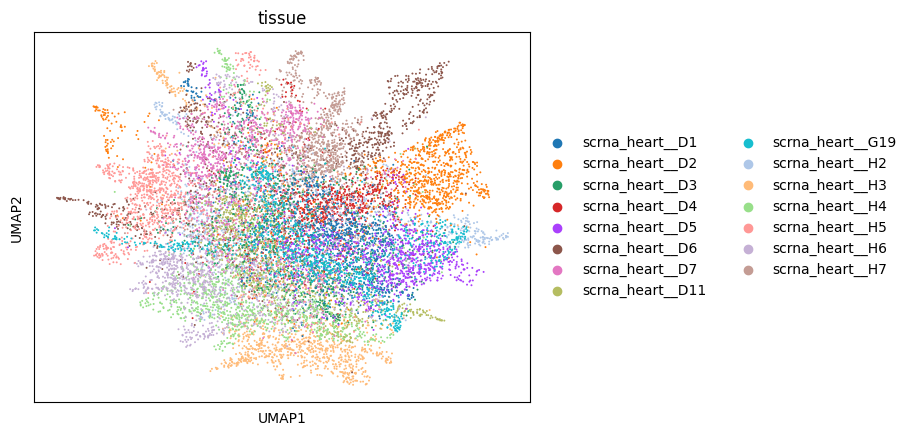

In [24]:
sc.pl.umap(adata, color='tissue')

In [25]:
sc.tl.leiden(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


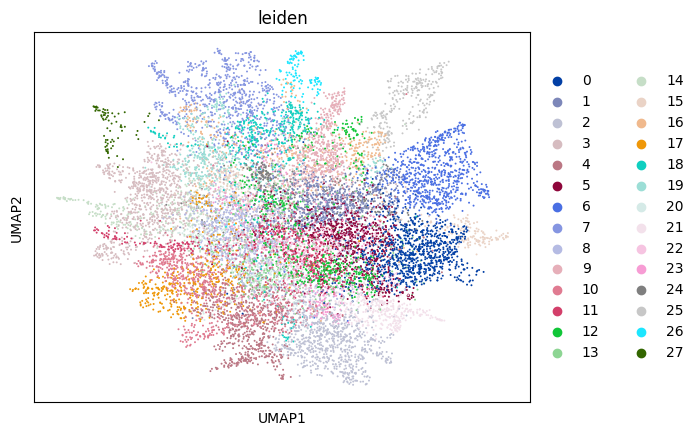

In [26]:
sc.pl.umap(adata, color='leiden')

In [27]:
adata

AnnData object with n_obs × n_vars = 15000 × 32
    obs: 'gene', 'tissue', 'leiden'
    uns: 'neighbors', 'umap', 'tissue_colors', 'leiden', 'leiden_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [28]:
adata.write_h5ad("heart_global/heart_umi_sharedAutoencoder.h5ad")

In [29]:
class GCNEncoder_Multiinput(torch.nn.Module):
    def __init__(self, out_channels, graph_list, label_list):
        super(GCNEncoder_Multiinput, self).__init__()
        self.activ = nn.Mish()
        
        conv_dict = {}
        for i in graph_list:
            conv_dict[i.show_index] = torch_geometric.nn.Sequential('x, edge_index', [(TransformerConv(i.x.shape[1], out_channels, heads = 4),'x, edge_index -> x'),
                                                     (torch_geometric.nn.GraphNorm(out_channels*4), 'x -> x')])
        self.convl1 = nn.ModuleDict(conv_dict)
    
        
    def forward(self, x, edge_index, show_index):
        x = self.convl1[show_index](x, edge_index)
        x = self.activ(x)
        return x

In [30]:
class GCNEncoder_Commoninput(torch.nn.Module):
    def __init__(self, out_channels, graph_list, label_list):
        super(GCNEncoder_Commoninput, self).__init__()
        self.activ = nn.Mish()
        
        conv_dict_l2 = {}
        conv_dict_l3 = {}
        tissue_specific_list = list(set(label_list))
        
        for i in tissue_specific_list:
            conv_dict_l2[i] = torch_geometric.nn.Sequential('x, edge_index', [(TransformerConv(out_channels*4, out_channels, heads = 2),'x, edge_index -> x'),
                                                     (torch_geometric.nn.GraphNorm(out_channels*2), 'x -> x')])
            conv_dict_l3[i] = TransformerConv(out_channels*2, out_channels)
        self.convl2 = nn.ModuleDict(conv_dict_l2)
        self.convl3 = nn.ModuleDict(conv_dict_l3)
        
        self.gn = torch_geometric.nn.GraphNorm(out_channels*2)
        
        
    
    def get_weight(self, show_index):
        return self.convl2[show_index.split('__')[0]].state_dict(), self.convl3[show_index.split('__')[0]].state_dict()
            
        
    def forward(self, x, edge_index, show_index):
        x = self.convl2[show_index.split('__')[0]](x, edge_index)
        x = self.activ(x)
        return self.convl3[show_index.split('__')[0]](x, edge_index)

In [31]:
class MLP_edge_Decoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels, graph_list):
        super(MLP_edge_Decoder, self).__init__()
        
        dec_dict = {}
        for i in graph_list:
            dec_dict[i.show_index] = torch.nn.Sequential(
                                              nn.Linear(in_channels,  out_channels)
                                             , nn.Mish(),
                                              nn.Linear(out_channels,  out_channels) 
                                              ,nn.Mish(),
                                              nn.Linear(out_channels,  out_channels)
                                             )
        self.MLP = nn.ModuleDict(dec_dict)
        
    def forward(self, x, show_index):
        x = self.MLP[show_index](x)
        return torch.sigmoid(x)

In [32]:
from torch_geometric.nn import DataParallel

In [33]:
gene_encoder_is = GCNEncoder_Multiinput(32, graph_list, label_list).to(device)
gene_encoder_com = GCNEncoder_Commoninput(32, graph_list, label_list).to(device)

In [34]:
gene_decoder = MLP_edge_Decoder(1000,1000,graph_list).to(device)

In [35]:
print(f"Let's use {torch.cuda.device_count()} GPUs!")

Let's use 1 GPUs!


In [36]:
optimizer_enc_is = torch.optim.Adam(gene_encoder_is.parameters(), lr=1e-4)
optimizer_enc_com = torch.optim.Adam(gene_encoder_com.parameters(), lr=1e-4)

In [37]:
optimizer_enc_com

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    maximize: False
    weight_decay: 0
)

In [38]:
optimizer_dec2 = torch.optim.Adam(gene_decoder.parameters(), lr=1e-3)

In [39]:
loss_f = nn.BCELoss()

In [40]:
# Z = np.load("graph_sim_cscore_global.npy")
# Z = np.load("graph_sim_cscore_global_withrna.npy")
# Z = np.load("graph_sim_cscore_global_withrna_withspatial.npy")

In [41]:
Z

array([[1.        , 0.09733333, 0.1085    , 0.1205    , 0.0975    ],
       [0.09733333, 1.        , 0.098     , 0.10266667, 0.0945    ],
       [0.1085    , 0.098     , 1.        , 0.105     , 0.09683333],
       [0.1205    , 0.10266667, 0.105     , 1.        , 0.098     ],
       [0.0975    , 0.0945    , 0.09683333, 0.098     , 1.        ]])

In [42]:
!nvidia-smi

Tue Jan 17 22:31:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:3E:00.0 Off |                    0 |
| N/A   25C    P0    35W / 250W |   6701MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [43]:
for epoch in range(2000):
    
    loss = 0
    
    for i in range(0,len(graph_list)):
        
        optimizer_enc_is.zero_grad(set_to_none=True)
        optimizer_enc_com.zero_grad(set_to_none=True)
        optimizer_dec2.zero_grad(set_to_none=True)
        

        graph = graph_list[i].to(device)
        
        x = graph.x
        train_pos_edge_index = graph.edge_index
        
        x = gene_encoder_is(x, train_pos_edge_index, graph.show_index)
        z = gene_encoder_com(x, train_pos_edge_index, graph.show_index)
        
        edge_adj = torch.FloatTensor(cor_list[i].values).to(device)
        
        adj = torch.matmul(z, z.t())
        edge_reconstruct = gene_decoder(adj, graph.show_index)
        
        loss = loss_f(edge_reconstruct.flatten(), edge_adj.flatten())
        
        if epoch % 200 ==0:
            print(loss)
                    
        loss.backward()
        
        optimizer_enc_is.step()
        optimizer_enc_com.step()
        optimizer_dec2.step()
    print("epoch finish")

tensor(0.6991, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7007, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6975, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6970, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6974, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6974, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6971, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6965, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6981, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6952, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6960, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6970, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6965, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6971, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor

epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish

epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish

epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
tensor(0.0005, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


tensor(6.4946e-05, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.2343e-05, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.1805e-05, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch finish
epoch

In [44]:
emb_list = []
gene_list = []
tissue_list = []

In [45]:
graph.show_index

'scrna_heart__G19rna'

In [46]:
with torch.no_grad():
    for i in range(0,len(graph_list)):
        graph = graph_list[i].to(device)
        x = graph.x
        train_pos_edge_index = graph.edge_index.long()
        
        x = gene_encoder_is(x, train_pos_edge_index, graph.show_index)
        z = gene_encoder_com(x, train_pos_edge_index, graph.show_index)
        
        emb_list.append(z.cpu().numpy())
        
        gene_list.append(graph.gene_list)
        tissue_list.append([graph.show_index for j in range(len(x))])

In [47]:
gene_list

[Index(['HES4', 'GNB1', 'RPL22', 'RBP7', 'NPPA', 'NPPB', 'DHRS3', 'KAZN',
        'PLA2G2A', 'PLA2G5',
        ...
        'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L',
        'MT-ND4', 'MT-ND5', 'MT-CYB'],
       dtype='object', length=1000),
 Index(['SPSB1', 'NPPA', 'NPPB', 'KAZN', 'PLA2G2A', 'PLA2G5', 'ALPL', 'HSPG2',
        'ID3', 'RCAN3',
        ...
        'ERG', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3',
        'MT-ND3', 'MT-ND4', 'MT-CYB'],
       dtype='object', length=1000),
 Index(['HES4', 'SLC2A5', 'SPSB1', 'NPPA', 'NPPB', 'TNFRSF1B', 'KAZN', 'TMEM51',
        'PLA2G2A', 'PLA2G5',
        ...
        'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3',
        'MT-ND4', 'MT-ND5', 'MT-CYB'],
       dtype='object', length=1000),
 Index(['ISG15', 'TNFRSF4', 'VWA1', 'HES5', 'RBP7', 'NPPA', 'NPPB', 'KAZN',
        'HSPB7', 'PLA2G2A',
        ...
        'S100B', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', '

In [48]:
adata = sc.AnnData(np.concatenate(emb_list))

In [49]:
adata

AnnData object with n_obs × n_vars = 15000 × 32

In [50]:
adata.obs['gene'] = np.concatenate(gene_list)
adata.obs['tissue'] = np.concatenate(tissue_list)

In [51]:
adata.obs['tissue']

0            scrna_heart__D4
1            scrna_heart__D4
2            scrna_heart__D4
3            scrna_heart__D4
4            scrna_heart__D4
                ...         
14995    scrna_heart__G19rna
14996    scrna_heart__G19rna
14997    scrna_heart__G19rna
14998    scrna_heart__G19rna
14999    scrna_heart__G19rna
Name: tissue, Length: 15000, dtype: object

In [52]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


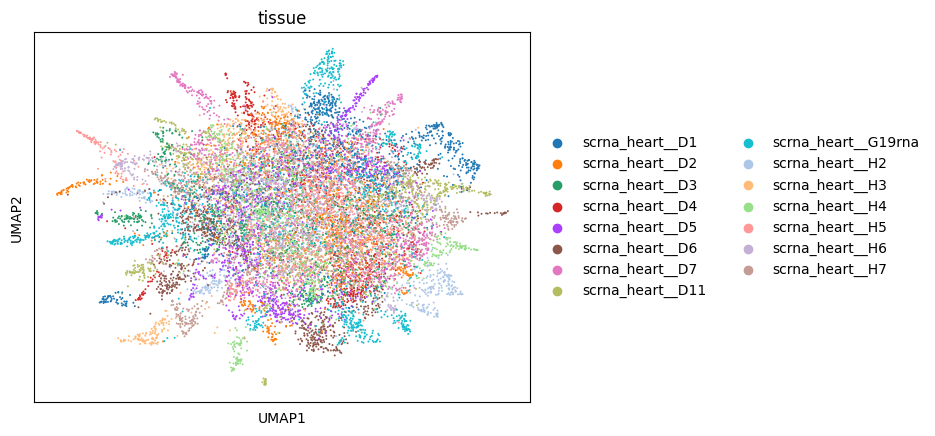

In [53]:
sc.pl.umap(adata, color='tissue')

In [54]:
sc.tl.leiden(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


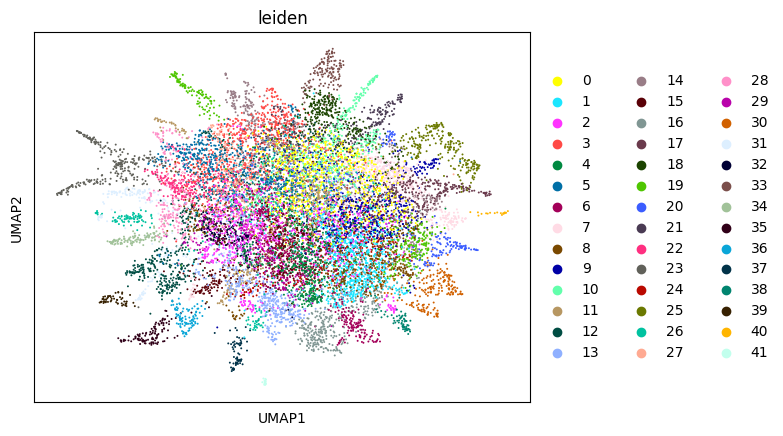

In [55]:
sc.pl.umap(adata, color='leiden')

In [56]:
adata.obs['tissue_new'] = [i.split("__")[0] for i in adata.obs['tissue']]

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


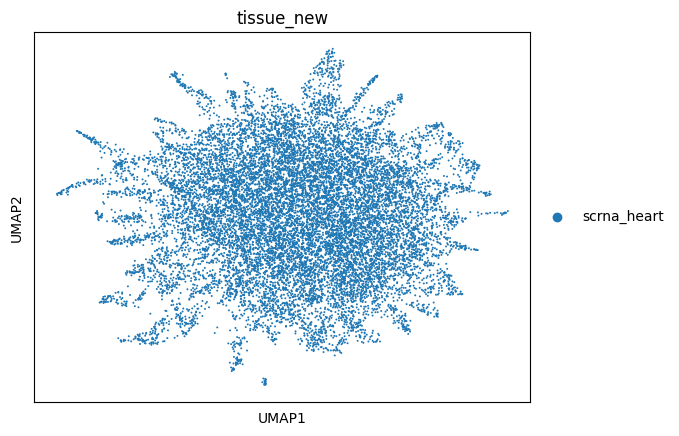

In [57]:
sc.pl.umap(adata, color='tissue_new')

In [58]:
adata.write_h5ad("heart_global/heart_umi_shareGAE")

# PCA

In [8]:
graph_list

[Data(x=[1000, 26997], edge_index=[2, 790658], gene_list=Index(['HES4', 'GNB1', 'NPPA', 'NPPB', 'DHRS3', 'KAZN', 'PLA2G2A', 'PLA2G5',
        'ECE1', 'HSPG2',
        ...
        'APP', 'ADAMTS1', 'EVA1C', 'AP000311.1', 'KCNJ6', 'BACE2', 'C2CD2',
        'COL18A1', 'COL6A1', 'COL6A2'],
       dtype='object', length=1000), show_index='scrna_heart__D4'),
 Data(x=[1000, 20506], edge_index=[2, 611364], gene_list=Index(['SPSB1', 'NPPA', 'NPPB', 'KAZN', 'PLA2G2A', 'PLA2G5', 'ALPL', 'HSPG2',
        'ID3', 'RCAN3',
        ...
        'SAMSN1', 'NCAM2', 'APP', 'CYYR1-AS1', 'CYYR1', 'ADAMTS1', 'TIAM1',
        'KCNE1', 'RUNX1', 'ERG'],
       dtype='object', length=1000), show_index='scrna_heart__H2'),
 Data(x=[1000, 31455], edge_index=[2, 709450], gene_list=Index(['HES4', 'SLC2A5', 'SPSB1', 'NPPA', 'NPPB', 'TNFRSF1B', 'KAZN', 'TMEM51',
        'PLA2G2A', 'PLA2G5',
        ...
        'CYYR1', 'EVA1C', 'KCNE1', 'RUNX1', 'ERG', 'ETS2', 'BACE2', 'C2CD2',
        'COL18A1', 'COL6A2'],
       dtyp

In [19]:
emb_list = []
gene_list = []
tissue_list = []

In [20]:
len(tissue_list)

0

In [21]:
for i in range(0,len(graph_list)):
    graph = graph_list[i]
    adata = sc.AnnData(graph.x.cpu().numpy())
    sc.pp.scale(adata)
    sc.tl.pca(adata, 32)

    emb_list.append(adata.obsm['X_pca'])

    gene_list.append(graph.gene_list)
    tissue_list.append([graph.show_index for j in range(len(graph.x))])

In [22]:
adata = sc.AnnData(np.concatenate(emb_list))

In [23]:
adata

AnnData object with n_obs × n_vars = 15000 × 32

In [24]:
adata.obs['gene'] = np.concatenate(gene_list)
adata.obs['tissue'] = np.concatenate(tissue_list)

In [25]:
adata.obs['tissue']

0         scrna_heart__D4
1         scrna_heart__D4
2         scrna_heart__D4
3         scrna_heart__D4
4         scrna_heart__D4
               ...       
14995    scrna_heart__G19
14996    scrna_heart__G19
14997    scrna_heart__G19
14998    scrna_heart__G19
14999    scrna_heart__G19
Name: tissue, Length: 15000, dtype: object

In [26]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


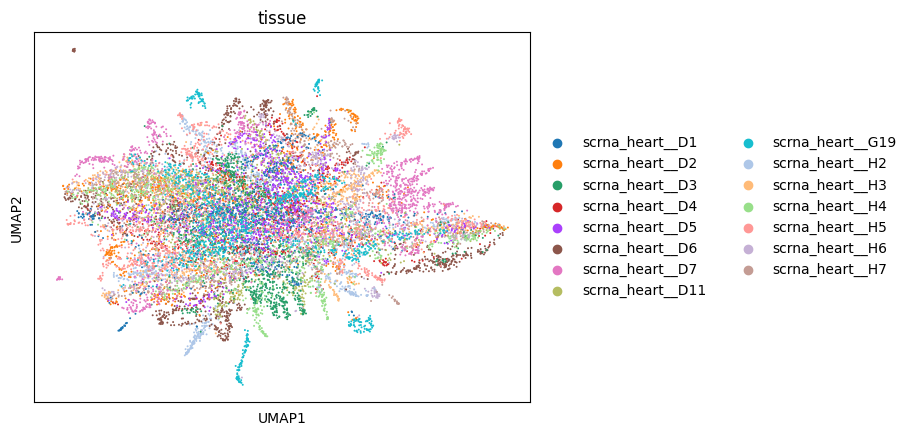

In [27]:
sc.pl.umap(adata, color='tissue')

In [28]:
sc.tl.leiden(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


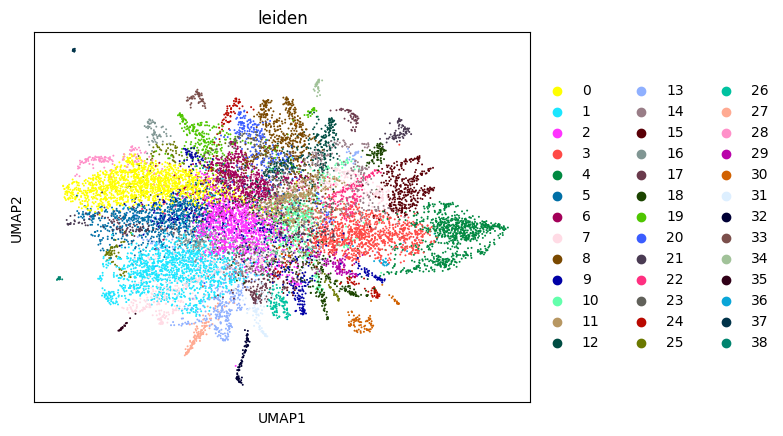

In [29]:
sc.pl.umap(adata, color='leiden')

In [30]:
adata.obs['tissue_new'] = [i.split("__")[0] for i in adata.obs['tissue']]

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


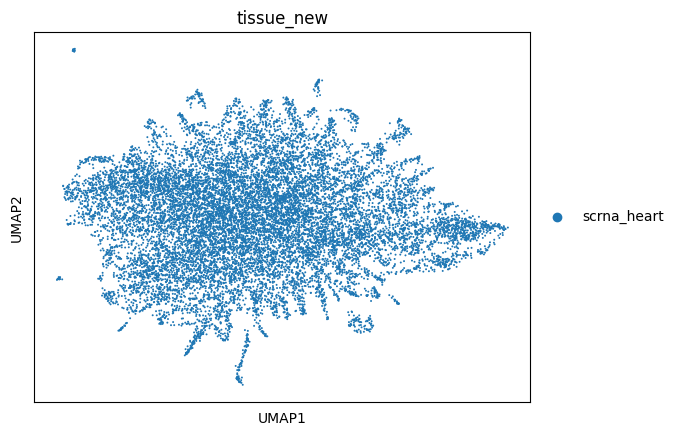

In [31]:
sc.pl.umap(adata, color='tissue_new')

In [32]:
adata.write_h5ad("heart_global/heart_umi_PCA.h5ad")

# Gene2vec

In [33]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

import torch
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import scanpy as sc
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [34]:
import gensim, logging
import os
import random
import datetime
import generateMatrix as gM
import argparse

In [35]:
####training parameters########
dimension = 32  # dimension of the embedding
num_workers = 32  # number of worker threads
sg = 1  # sg =1, skip-gram, sg =0, CBOW
max_iter = 10  # number of iterations
window_size = 1  # The maximum distance between the gene and predicted gene within a gene list
txtOutput = True

In [36]:
# model = gensim.models.Word2Vec(gene_pairs, vector_size=dimension, window=window_size, min_count=1, workers=num_workers,sg=sg, )
# model.train(gene_pairs,total_examples=model.corpus_count,epochs=max_iter)

In [37]:
# vector = model.wv['ENSG00000158747.15'] 

In [38]:
# vector_list = np.zeros((1000,32))
# gene_list = []
# for num,i in enumerate(edge_list.index):
#     vector_list[num] = model.wv[i] 
#     gene_list.append(i)

In [39]:
# gene_list

In [40]:
def generate_list(model, edge_list):
    vector_list = np.zeros((1000,32))
    gene_list = []
    for num,i in enumerate(edge_list.index):
        vector_list[num] = model.wv[i] 
        gene_list.append(i)
    
    return vector_list, gene_list

In [41]:
vec_list = []
gene_list_final = []

for num,i in enumerate(graph_list):
    edge_list = cor_list[num]
    
    nonz_index = np.nonzero(edge_list.values)
    
    gene_pairs = []
    for i,j in zip(nonz_index[0], nonz_index[1]):
        gene_pairs.append([edge_list.index[i], edge_list.columns[j]])
        
    model = gensim.models.Word2Vec(gene_pairs, vector_size=dimension, window=window_size, min_count=1, workers=num_workers,sg=sg, )
    model.train(gene_pairs,total_examples=model.corpus_count,epochs=max_iter)
    
    print('finish gene2vec training')
    vector_list = np.zeros((1000,32))
    gene_list = []
    for num,i in enumerate(edge_list.index):
        vector_list[num] = model.wv[i] 
        gene_list.append(i)
        
    vec_list.append(vector_list)
    gene_list_final.append(gene_list)
    

finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training
finish gene2vec training


In [42]:
tissue_list = []
for graph in graph_list:
    label_list = [graph.show_index for i in range(len(graph.x))]
    tissue_list.append(label_list)

In [43]:
np.concatenate(np.array(tissue_list))

array(['scrna_heart__D4', 'scrna_heart__D4', 'scrna_heart__D4', ...,
       'scrna_heart__G19', 'scrna_heart__G19', 'scrna_heart__G19'],
      dtype='<U16')

In [44]:
adata = sc.AnnData(np.concatenate(np.array(vec_list)))

/tmp/ipykernel_3084/1547028136.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(np.concatenate(np.array(vec_list)))


In [45]:
adata.obs['tissue'] = np.concatenate(np.array(tissue_list))

In [46]:
adata.obs['gene'] = np.concatenate(np.array(gene_list_final))

In [47]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

In [48]:
sc.tl.leiden(adata)

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


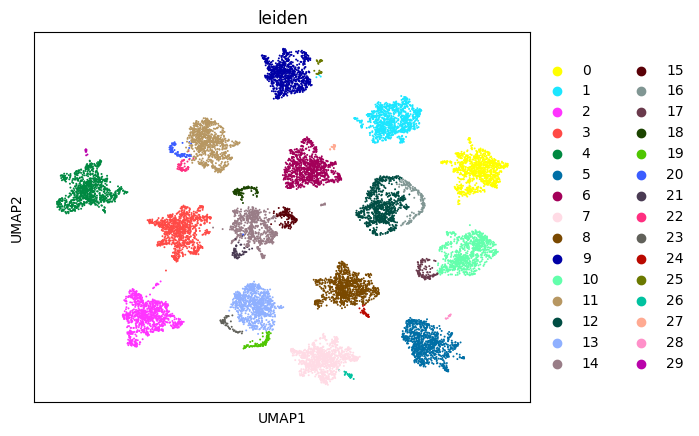

In [49]:
sc.pl.umap(adata, color='leiden')

/gpfs/ysm/project/zhao/tl688/conda_envs/pyg/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


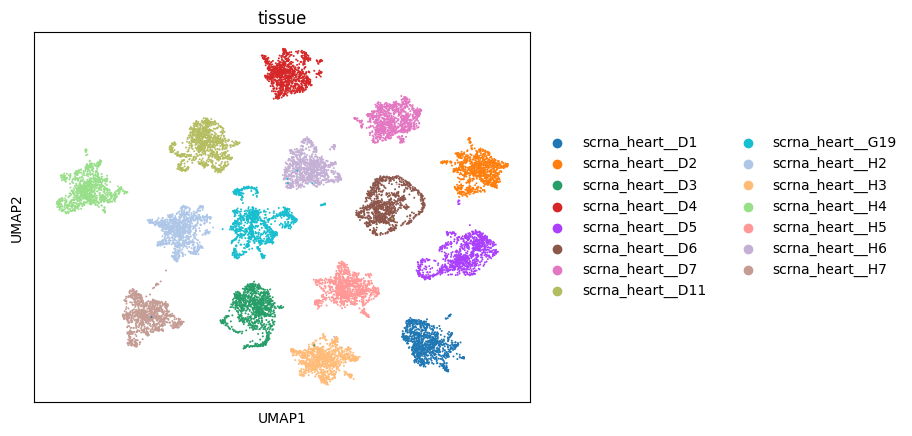

In [50]:
sc.pl.umap(adata, color='tissue')

In [51]:
adata.write_h5ad('heart_global/heart_umi_gene2vec.h5ad')

# GIANT

In [95]:
# Please see the folder of GIANT

In [52]:
adata = sc.read_h5ad("/ysm-gpfs/pi/zhao/tl688/GIANT/GIANT/src/analysis/heart_global/heart_umi_GIANT.h5ad")

In [59]:
adata

AnnData object with n_obs × n_vars = 15000 × 128
    obs: 'gene', 'tissue', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'